# Electrical Power consumption in the Nordic and Baltic countries in 2014-19

Data of the daily electric power consumption in 4 continental Nordic countries (Norway (NO), Sweden (SE), Denmark (DK), Finland (FI)) and in 3 Baltic states (Estonia (EE), Latvia (LV), Lithuania (LT)) is taken from the Historical Market Data at the site of power exchange Nord Pool.
The values are in MWh.

The link: https://www.nordpoolgroup.com/historical-market-data/

![Powerline](https://www.energiauutiset.fi/media/energiauutiset/sahkoverkot/2018/grid.png)

## Importing libraries

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots

In [3]:
from ipywidgets import interact, interactive,fixed,interact_manual
import ipywidgets as widgets

In [4]:
countries = ["NO","SE","FI", "DK","EE", "LV", "LT", "Nordic","Baltic"]
abbreviations = {"NO":"Norway",
                "SE":"Sweden",
                "DK":"Denmark",
                "FI":"Finland",
                "Nordic":"Nordic countries",
                "EE":"Estonia",
                "LV":"Latvia",
                "LT":"Lithuania",
                "Baltic":"Baltic states"}

In [5]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [i for i in range(2014,2020)]
colors = {"NO":"red", "SE":"blue", "FI":"yellow", "DK":"indianred", "EE":"navy", "LV":"brown", "LT":"green",
         "Nordic":"blue", "Baltic":"green"}
nordic_colors = ["red", "blue", "yellow", "indianred"]
baltic_colors = ["navy", "brown", "green"]
nordic_and_baltic_colors = ["blue", "green"]

## Creating the dataset

The data is saved on the site as yearly files. We download them and save into the list.

In [6]:
dailyconsumptions = []

for i in range(2014,2020):
    fileName = "Data/consumption-per-country_" + str(i) +"_daily.csv"
    data = pd.read_csv(fileName, header=2, delimiter=";")
    dailyconsumptions.append(data)
    

And then concatenate them to form a single dataset "consumptions".

In [7]:
consumptions = dailyconsumptions[0]
for j in range(1, len(dailyconsumptions)):
    consumptions = pd.concat([consumptions, dailyconsumptions[j]])


## Exploring the dataset

In [8]:
consumptions.head(10)


,Unnamed: 0,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
0,01.01.2014,366427,384749,222609,83837,1057638,19487,17885,22959,60331
1,02.01.2014,399918,411970,246089,99705,1157684,23373,21578,27295,72246
2,03.01.2014,394838,412474,252240,98515,1158079,24053,22123,27322,73498
3,04.01.2014,373405,390819,239997,89931,1094167,21959,20152,24993,67104
4,05.01.2014,369245,388306,229357,88121,1075031,21025,19587,24387,64999
5,06.01.2014,403916,403736,235181,106722,1149558,24258,22621,28333,75212
6,07.01.2014,390178,424245,249519,106674,1170623,24441,22707,28536,75684
7,08.01.2014,392452,429362,245834,105888,1173546,24196,22177,28314,74687
8,09.01.2014,413342,443218,247173,109110,1212848,24021,22371,28118,74510
9,10.01.2014,429543,463875,261582,106588,1261598,24591,22169,27639,74399


In [9]:
consumptions.tail(10)

,Unnamed: 0,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
355,22.12.2019,407024,381602,221879,88327,1098844,22221,18838,31967,73026
356,23.12.2019,429045,398944,221337,93465,1142801,22716,20016,33447,54837
357,24.12.2019,420220,371505,212020,85976,1089726,21282,18268,30322,69872
358,25.12.2019,415527,377500,211261,82556,1086844,20779,17131,27782,65692
359,26.12.2019,434658,403934,216217,84816,1139629,21932,18113,29311,69356
360,27.12.2019,460167,437592,241661,93113,1232536,24133,19943,32877,76953
361,28.12.2019,442388,441166,251740,92159,1227453,23841,19371,32318,75530
362,29.12.2019,394046,396131,231863,91624,1113664,23689,18901,31866,74456
363,30.12.2019,394922,389466,229510,96420,1110331,23980,19782,33985,77747
364,31.12.2019,410930,385125,240828,89113,1128907,22758,18300,32882,74900


In [10]:
consumptions.shape

(2191, 10)

The dataset contains 2191 rows, so no day is missing; and 10 columns (consumption for 7 countries, summary for the Nordic and the Baltic, and date).

In [11]:
firstday = dt.datetime(2014,1,1)
lastday = dt.datetime(2020,1,1)
days = lastday - firstday
days

datetime.timedelta(days=2191)

In [12]:
# The dataset doesn't contain any null values. So, no need to tidy it.
consumptions.isnull().values.any()

False

In [13]:
consumptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 364
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2191 non-null   object
 1   NO          2191 non-null   int64 
 2   SE          2191 non-null   int64 
 3   FI          2191 non-null   int64 
 4   DK          2191 non-null   int64 
 5   Nordic      2191 non-null   int64 
 6   EE          2191 non-null   int64 
 7   LV          2191 non-null   int64 
 8   LT          2191 non-null   int64 
 9   Baltic      2191 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 188.3+ KB


The date in the dataset is object, i.e. string. We convert it into the datetime object and rename the column into "Date.

In [14]:
consumptions["Unnamed: 0"] = pd.to_datetime(consumptions["Unnamed: 0"],format = "%d.%m.%Y")

In [15]:
consumptions.dtypes


Unnamed: 0    datetime64[ns]
NO                     int64
SE                     int64
FI                     int64
DK                     int64
Nordic                 int64
EE                     int64
LV                     int64
LT                     int64
Baltic                 int64
dtype: object

In [16]:
consumptions = consumptions.rename(columns={"Unnamed: 0": "Date"})
#consumptions['Year'] = pd.DatetimeIndex(consumptions['Date']).year
#consumptions['Month'] = pd.DatetimeIndex(consumptions['Date']).month
consumptions.head()

,Date,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
0,2014-01-01,366427,384749,222609,83837,1057638,19487,17885,22959,60331
1,2014-01-02,399918,411970,246089,99705,1157684,23373,21578,27295,72246
2,2014-01-03,394838,412474,252240,98515,1158079,24053,22123,27322,73498
3,2014-01-04,373405,390819,239997,89931,1094167,21959,20152,24993,67104
4,2014-01-05,369245,388306,229357,88121,1075031,21025,19587,24387,64999


## Preparing the dataset

In [17]:
# Daily consumptions
CMD = consumptions.set_index("Date")
CMD.head()


,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
Date,,,,,,,,,
2014-01-01,366427,384749,222609,83837,1057638,19487,17885,22959,60331
2014-01-02,399918,411970,246089,99705,1157684,23373,21578,27295,72246
2014-01-03,394838,412474,252240,98515,1158079,24053,22123,27322,73498
2014-01-04,373405,390819,239997,89931,1094167,21959,20152,24993,67104
2014-01-05,369245,388306,229357,88121,1075031,21025,19587,24387,64999


In [18]:
#Setting MultiIndex
CY = consumptions.set_index([CMD.index.year, "Date"]) 
CY

NO      SE      FI     DK   Nordic     EE     LV     LT  \
Date Date                                                                      
2014 2014-01-01  366427  384749  222609  83837  1057638  19487  17885  22959   
     2014-01-02  399918  411970  246089  99705  1157684  23373  21578  27295   
     2014-01-03  394838  412474  252240  98515  1158079  24053  22123  27322   
     2014-01-04  373405  390819  239997  89931  1094167  21959  20152  24993   
     2014-01-05  369245  388306  229357  88121  1075031  21025  19587  24387   
...                 ...     ...     ...    ...      ...    ...    ...    ...   
2019 2019-12-27  460167  437592  241661  93113  1232536  24133  19943  32877   
     2019-12-28  442388  441166  251740  92159  1227453  23841  19371  32318   
     2019-12-29  394046  396131  231863  91624  1113664  23689  18901  31866   
     2019-12-30  394922  389466  229510  96420  1110331  23980  19782  33985   
     2019-12-31  410930  385125  240828  89113  1128907  22758  18300  32882   

                 Baltic  
Date Date                
2014 2014-01-01   60331  
     2014-01-02   72246  
     2014-01-03   73498  
     2014-01-04   67104  
     2014-01-05   64999  
...                 ...  
2019 2019-12-27   76953  
     2019-12-28   75530  
     2019-12-29   74456  
     2019-12-30   77747  
     2019-12-31   74900  

[2191 rows x 9 columns]

In [19]:
#CY2016 - Consumpion Yearly without 2016-02-29

In [20]:
CY2016 = CY.drop(index=pd.Timestamp("2016-02-29"),level=1)

In [21]:
CY2016.loc[2016].loc["2016-02-25":"2016-03-02"]

,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
Date,,,,,,,,,
2016-02-25,462529,489577,261725,101972,1301466,24986,21920,29912,76818
2016-02-26,454288,480943,269715,97465,1287746,25154,21817,29336,76307
2016-02-27,434837,449688,258279,89543,1219649,22638,19252,26307,68197
2016-02-28,428176,448231,245553,89174,1197196,21976,18832,25682,66490
2016-03-01,468967,486994,262262,102714,1320948,26096,21864,29918,77878
2016-03-02,466987,480415,263285,104020,1314715,26329,21870,29994,78193


## Yearly patterns. Graphs

In [22]:
def daily_consumption(choice):
    fig,ax = plt.subplots(figsize=(20,10))
    
    for i in range(2014,2020):
        ax.plot(pd.date_range(start="2014-01-01",end="2014-12-31"), CY2016.loc[i][choice])
        
   
    ax.set_title("Yearly consumption pattern. 2014-19. "+abbreviations[choice])
    ax.legend(["2014","2015","2016","2017","2018","2019"], loc = "upper center")
    ax.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2014-12-31'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    for key, spine in ax.spines.items():
        spine.set_visible(False)

In [23]:
interact(daily_consumption,choice=CY2016.columns[:-1])

interactive(children=(Dropdown(description='choice', options=('NO', 'SE', 'FI', 'DK', 'Nordic', 'EE', 'LV', 'L…

<function __main__.daily_consumption(choice)>

The result of plotting has too much "ink". The plot with monthly means would be more visual to depict the pattern of consumption throught a year.

## Yearly consumption by monthly means 

In [24]:
CMmean = CMD.resample("M").mean().round(0)
CMmean

,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
Date,,,,,,,,,
2014-01-31,449989.0,477985.0,281437.0,106612.0,1316031.0,26726.0,23409.0,29147.0,79283.0
2014-02-28,416771.0,443268.0,262137.0,102471.0,1224655.0,25075.0,22378.0,28338.0,75792.0
2014-03-31,385508.0,404266.0,241778.0,94857.0,1126419.0,22702.0,20284.0,25328.0,68314.0
2014-04-30,338718.0,362365.0,223276.0,87699.0,1011962.0,21007.0,18587.0,24924.0,64519.0
2014-05-31,302799.0,325447.0,204573.0,84739.0,917618.0,19397.0,17635.0,24219.0,61252.0
...,...,...,...,...,...,...,...,...,...
2019-08-31,280719.0,298298.0,195848.0,86246.0,861115.0,19516.0,18572.0,30992.0,69080.0
2019-09-30,310514.0,325048.0,205682.0,87685.0,928933.0,20630.0,18737.0,31685.0,71052.0
2019-10-31,368344.0,374795.0,229224.0,93395.0,1065763.0,22951.0,19721.0,33272.0,75944.0


In [25]:
CMmean["Year"] = CMmean.index.year

CMmeanMI = CMmean.set_index("Year", append=True).reorder_levels(["Year", 'Date'])
CMmeanMI

NO        SE        FI        DK     Nordic       EE  \
Year Date                                                                     
2014 2014-01-31  449989.0  477985.0  281437.0  106612.0  1316031.0  26726.0   
     2014-02-28  416771.0  443268.0  262137.0  102471.0  1224655.0  25075.0   
     2014-03-31  385508.0  404266.0  241778.0   94857.0  1126419.0  22702.0   
     2014-04-30  338718.0  362365.0  223276.0   87699.0  1011962.0  21007.0   
     2014-05-31  302799.0  325447.0  204573.0   84739.0   917618.0  19397.0   
...                   ...       ...       ...       ...        ...      ...   
2019 2019-08-31  280719.0  298298.0  195848.0   86246.0   861115.0  19516.0   
     2019-09-30  310514.0  325048.0  205682.0   87685.0   928933.0  20630.0   
     2019-10-31  368344.0  374795.0  229224.0   93395.0  1065763.0  22951.0   
     2019-11-30  435138.0  419261.0  248039.0   99347.0  1201790.0  24834.0   
     2019-12-31  436561.0  425573.0  239476.0   99007.0  1200716.0  24723.0   

                      LV       LT   Baltic  
Year Date                                   
2014 2014-01-31  23409.0  29147.0  79283.0  
     2014-02-28  22378.0  28338.0  75792.0  
     2014-03-31  20284.0  25328.0  68314.0  
     2014-04-30  18587.0  24924.0  64519.0  
     2014-05-31  17635.0  24219.0  61252.0  
...                  ...      ...      ...  
2019 2019-08-31  18572.0  30992.0  69080.0  
     2019-09-30  18737.0  31685.0  71052.0  
     2019-10-31  19721.0  33272.0  75944.0  
     2019-11-30  20737.0  35070.0  80641.0  
     2019-12-31  20769.0  35101.0  79935.0  

[72 rows x 9 columns]

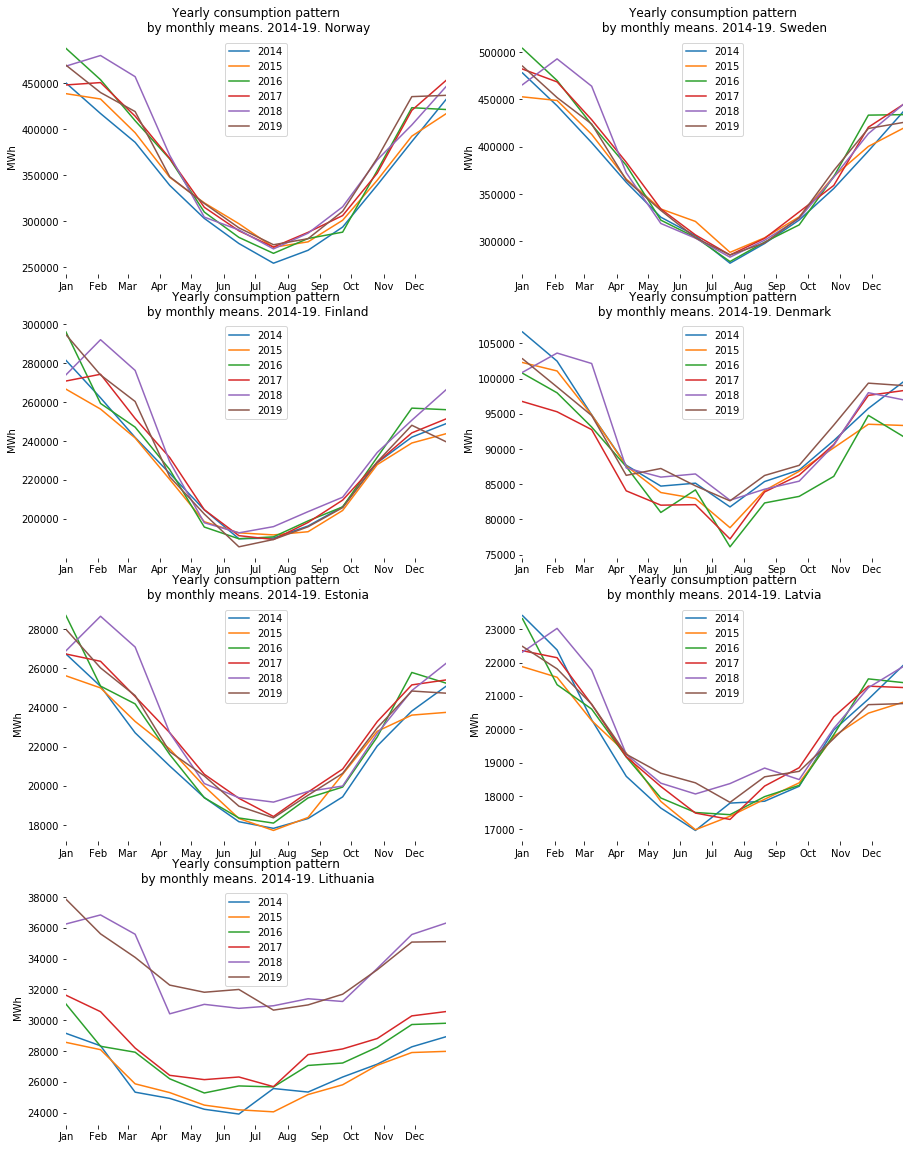

In [26]:
fig = plt.figure(figsize=(15,20))

for j in range(7):
    ax = fig.add_subplot(4,2,j+1)
    for i in range(2014,2020):
        ax.plot(pd.date_range(start="2014-01-01",end="2014-12-31", periods=12), CMmeanMI.loc[i][countries[j]])
   
    ax.set_title("Yearly consumption pattern\n by monthly means. 2014-19. " + abbreviations[countries[j]])
    ax.legend(years,loc = "upper center")
    #ax.set_ylim(0,500000)
    ax.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2014-12-31'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.set_ylabel("MWh")
    for key, spine in ax.spines.items():
        spine.set_visible(False)

In fact, the graphs are not in one scale. They are just to show the common pattern.
We can see it clearly in all countries - the consumption is higher in winter and drops significantly in summer.

## Daily consumptions distribution 

In [27]:
def box_plots(choice):
    
    
    fig = px.box(CMD, x=CMD.index.year, y=choice, )

    fig.update_traces(marker_color=colors[choice])
    
    fig.update_layout(title='Daily consumptions distribution. '+abbreviations[choice],
                   yaxis_title='MWh',
                  xaxis_title=None,
                  
                  showlegend = False)              

    fig.show()  
    

In [28]:
interact(box_plots,choice=CY2016.columns[:-1])

interactive(children=(Dropdown(description='choice', options=('NO', 'SE', 'FI', 'DK', 'Nordic', 'EE', 'LV', 'L…

<function __main__.box_plots(choice)>

In [29]:
CY.loc[2014]["FI"].sort_values()[:10]

Date
2014-06-21    156412
2014-06-20    160148
2014-06-22    160941
2014-07-27    172380
2014-08-03    174384
2014-05-25    175304
2014-06-15    175796
2014-08-10    176398
2014-06-19    176769
2014-07-20    177049
Name: FI, dtype: int64

In [30]:
CY.loc[2014]["FI"].sort_values(ascending=False)[:10]

Date
2014-01-20    320256
2014-01-23    318617
2014-01-17    317499
2014-01-24    316081
2014-01-31    314443
2014-01-16    311563
2014-01-22    311512
2014-01-21    311348
2014-01-30    307966
2014-01-15    307855
Name: FI, dtype: int64

The minimal consumption occurs on the summer weekends, most noticably on Juhannus. The maximal consumption occurs in January.

## Mean of means through the years

In [31]:
CMmean["Month"] = CMmean.index.month
CMmean["Year"] = CMmean.index.year
CMmeanMean = CMmean.pivot(index = "Month",
                          columns = "Year",
                          values = ["NO"])
CMmeanMean["Mean"] = CMmeanMean.mean(axis=1).round(0)
CMmeanMean

NO                                                        Mean
Year       2014      2015      2016      2017      2018      2019          
Month                                                                      
1      449989.0  438368.0  487631.0  447844.0  468290.0  469371.0  460249.0
2      416771.0  432558.0  453508.0  450420.0  479846.0  439583.0  445448.0
3      385508.0  395910.0  408986.0  413939.0  456847.0  418915.0  413351.0
4      338718.0  347419.0  367478.0  368083.0  371359.0  348097.0  356859.0
5      302799.0  319636.0  309682.0  314880.0  304168.0  319052.0  311703.0
6      275488.0  297009.0  282144.0  289314.0  290223.0  292534.0  287785.0
7      254073.0  271373.0  264789.0  271633.0  269623.0  274148.0  267606.0
8      268116.0  277293.0  280935.0  287613.0  286694.0  280719.0  280228.0
9      293370.0  300737.0  287835.0  305862.0  315384.0  310514.0  302284.0
10     338980.0  344262.0  354765.0  351920.0  366385.0  368344.0  354109.0
11     386266.0  392193.0  423108.0  420258.0  404347.0  435138.0  410218.0
12     432499.0  416801.0  421124.0  453107.0  446497.0  436561.0  434432.0

In [32]:
A = pd.DataFrame()

for land in countries:
    A[land] = CMmean.pivot(index = "Month",
                          columns = "Year",
                          values = [land]
                          ).mean(axis=1).round(0)
A

,NO,SE,FI,DK,EE,LV,LT,Nordic,Baltic
Month,,,,,,,,,
1,460249.0,477906.0,280582.0,101680.0,27102.0,22625.0,32413.0,1315674.0,82135.0
2,445448.0,462559.0,269662.0,99872.0,26028.0,22042.0,31286.0,1273263.0,79307.0
3,413351.0,426184.0,253073.0,95409.0,24400.0,20736.0,29495.0,1185203.0,74599.0
4,356859.0,371528.0,225164.0,86741.0,21938.0,19119.0,27589.0,1038695.0,68641.0
5,311703.0,327926.0,200606.0,84142.0,19992.0,18125.0,27161.0,922242.0,65270.0
6,287785.0,307453.0,190269.0,84280.0,18758.0,17564.0,27150.0,868803.0,63473.0
7,267606.0,282988.0,191144.0,79892.0,18265.0,17680.0,27094.0,818998.0,63017.0
8,280228.0,300490.0,197654.0,84384.0,19164.0,18237.0,27954.0,862370.0,65354.0
9,302284.0,324309.0,207108.0,86095.0,20236.0,18512.0,28396.0,918988.0,67048.0


### Nordic countris 

In [33]:
def monthly_means(choice):
             

    fig = go.Figure(data=[go.Bar(
            x=months,
            y=A[choice],
            text=A[choice],
            textposition='outside',
            name = abbreviations[choice],
            marker_color = colors[choice]
        
        )])
    

    fig.update_layout(xaxis_tickangle=-45,
                  title={
                'text': "Mean monthly consumption in MWh. 2014-19. "+abbreviations[choice],
                'y':0.98,
                'x':0.5},
                  yaxis=dict(title='MWh'),   
                  
                 autosize=True, height = 500,
                                width = 1000)
    fig.show()

In [34]:
interact(monthly_means,choice=A.columns)

interactive(children=(Dropdown(description='choice', options=('NO', 'SE', 'FI', 'DK', 'EE', 'LV', 'LT', 'Nordi…

<function __main__.monthly_means(choice)>

In [35]:
fig = go.Figure()

for j in range(4):
    fig.add_trace(go.Bar(
    x=months,
    y=A[countries[j]],
    text=A[countries[j]],
    #textposition='outside',
    name=countries[j],
    marker_color=nordic_colors[j]))
    
    
   
fig.update_layout(barmode='group',
                  title={
                'text': "Monthly mean consumption in MWh. Nordic countries",
                'y':0.95,
                'x':0.5},
                  yaxis=dict(title='MWh'), 
                  
                  xaxis_tickangle=-45)
fig.show()

In [36]:
fig = go.Figure()

for j in range(3):
    fig.add_trace(go.Bar(
    x=months,
    y=A[countries[j+4]],
    text=A[countries[j+4]],
    #textposition='outside',
    name=countries[j+4],
    marker_color=baltic_colors[j]))
    
    
   
fig.update_layout(barmode='group',
                  title={
                'text': "Monthly mean consumption in GWh. Baltic countries",
                'y':0.95,
                'x':0.5},
                  yaxis=dict(title='MWh'), 
                  
                  xaxis_tickangle=-45)
fig.show()

### Nordic and Baltic countries in one scale

In [37]:
fig = go.Figure()

for j in range(2):
    fig.add_trace(go.Bar(
    x=months,
    y=A[countries[j+7]],
    text=A[countries[j+7]],
    #textposition='outside',
    name=countries[j+7],
    marker_color=nordic_and_baltic_colors[j]))
    
    
   
fig.update_layout(barmode='group',
                  title={
                'text': "Monthly mean consumption in MWh. Nordic and Baltic countries",
                'y':0.95,
                'x':0.5},
                  yaxis=dict(title='MWh'), 
                  
                  xaxis_tickangle=-45)
fig.show()

## Total yearly consumption

In [38]:
CYsum = CMD.resample("A").sum()
CYsum

,NO,SE,FI,DK,Nordic,EE,LV,LT,Baltic
Date,,,,,,,,,
2014-12-31,125875690,133809007,82514402,33504335,375685106,7889501,7172740,9651897,24714138
2015-12-31,128605318,134930317,81315464,32808126,377656960,7927881,7069438,9561246,24547124
2016-12-31,132333968,138199862,83948785,32283455,386293093,8178189,7207308,10132915,25448008
2017-12-31,132886291,138115777,83403366,32440139,384401638,8297733,7220405,10352219,25865737
2018-12-31,135428683,138199442,85780044,33569064,391955799,8428160,7344734,12150213,27917141
2019-12-31,133477214,136443237,83439919,33537335,385664194,8230923,7226367,12174254,27611162


### Nordic countries 

In [39]:
valuesNordic={}
for vuosi in range(2014,2020):
    a = CYsum.loc[str(vuosi),"NO":"DK"].values
    a = a/1000
    a = a.round(0).astype(int)
    valuesNordic[vuosi] = a[0]
#valuesNordic

In [40]:
def yearly_consumption_N(choice):
    
    valuesN = valuesNordic[int(choice)]
    marker_colors=nordic_colors
    
    labels = ["Norway","Sweden","Finland", "Denmark"]

    fig = go.Figure(data=[go.Pie(labels=labels, values=valuesN,
                   textinfo='label+value+percent',
                  marker_colors=nordic_colors
                     )])
  

    fig.update_layout(showlegend=False,
                    title={
                'text': "Yearly consumption ("+choice+", in GWh)",
                'y':0.98,
                'x':0.5})

    fig.show()

In [41]:
interact(yearly_consumption_N,choice=[str(vuosi) for vuosi in range(2014,2020)])

interactive(children=(Dropdown(description='choice', options=('2014', '2015', '2016', '2017', '2018', '2019'),…

<function __main__.yearly_consumption_N(choice)>

In [42]:
fig = go.Figure(data=[
    go.Bar(name='Norway', x=years, y=((CYsum["NO"].values)/1000).round(0).astype(int),
    marker_color='red'),
    go.Bar(name='Sweden', x=years, y=((CYsum["SE"].values)/1000).round(0).astype(int),
          marker_color='blue'),
    go.Bar(name='Finland', x=years, y=((CYsum["FI"].values)/1000).round(0).astype(int),
          marker_color='yellow'),
    go.Bar(name='Denmark', x=years, y=((CYsum["DK"].values)/1000).round(0).astype(int),
          marker_color='indianred'),
])

fig.update_layout(barmode='stack',
                 yaxis=dict(
        title='Consumption in GWh'))
fig.show()

### Baltic countries

In [43]:
valuesBaltic={}
for vuosi in range(2014,2020):
    a = CYsum.loc[str(vuosi),"EE":"LT"].values
    a = a/1000
    a = a.round(0).astype(int)
    valuesBaltic[vuosi] = a[0]
#valuesBaltic

In [44]:
def yearly_consumption_B(choice):
    valuesB = valuesBaltic[int(choice)]

    marker_colors=baltic_colors
    
    labels = ["Estonia","Latvia","Lithuania"]

    fig = go.Figure(data=[go.Pie(labels=labels, values=valuesB,
                   textinfo='label+value+percent',
                  marker_colors=marker_colors
                     )])
  

    fig.update_layout(showlegend=False,
                    title={
                'text': "Yearly consumption ("+choice+", in GWh)",
                'y':0.98,
                'x':0.5})

    fig.show()

In [45]:
interact(yearly_consumption_B,choice=[str(vuosi) for vuosi in range(2014,2020)])

interactive(children=(Dropdown(description='choice', options=('2014', '2015', '2016', '2017', '2018', '2019'),…

<function __main__.yearly_consumption_B(choice)>

In [46]:
fig = go.Figure(data=[
    go.Bar(name='Estonia', x=years, y=((CYsum["EE"].values)/1000).round(0).astype(int),
    marker_color='navy'),
    go.Bar(name='Latvia', x=years, y=((CYsum["LV"].values)/1000).round(0).astype(int),
          marker_color='red'),
    go.Bar(name='Lithuania', x=years, y=((CYsum["LT"].values)/1000).round(0).astype(int),
          marker_color='green'),

])

fig.update_layout(barmode='stack',
                 yaxis=dict(
        title='Consumption in GWh'))
fig.show()

### Yearly consumption of the Nordic and Baltic countries in comparison 

In [47]:
def annual_consumption(choice):
    valuesB = valuesBaltic[int(choice)]
    valuesN = valuesNordic[int(choice)]
    mjono1 = 'Baltic states ('+ str(int((((CYsum.loc[choice,"Baltic"].values)/1000).round(0))[0]))+' GWh)' 
    mjono2 = 'Nordic countries ('+ str(int((((CYsum.loc[choice,"Nordic"].values)/1000).round(0))[0]))+' GWh)'


    fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=[mjono1, mjono2])
    fig.add_trace(go.Pie(labels=labelsB, values=valuesB, scalegroup='one',
                     textinfo='label+value',
                     marker_colors = baltic_colors,
                     name="Baltic states. Annual consumption ("+choice+")"), 1, 1)
    fig.add_trace(go.Pie(labels=labelsN, values=valuesN, scalegroup='one',
                     textinfo='label+value',
                     marker_colors = nordic_colors,
                     name="Nordic countries. Annual consumption ("+choice+")"), 1, 2)


    fig.update_layout(showlegend=False,
                    title={
                'text': "Yearly consumption ("+choice+", in GWh) of the Nordic and Baltic countries in comparison",
                'y':0.98,
                'x':0.5})


    fig.show()

In [48]:
interact(annual_consumption,choice=[str(vuosi) for vuosi in range(2014,2020)])

interactive(children=(Dropdown(description='choice', options=('2014', '2015', '2016', '2017', '2018', '2019'),…

<function __main__.annual_consumption(choice)>

## Annual consumption growth

In [49]:

def consumption_growth(choice):
    
    fig = px.line(x=years, y=(CYsum[choice]/1000),
               )
    
    fig.update_traces(line_color=colors[choice],
                     mode='lines+markers')
    
    fig.update_layout(title='Total annual consumption in GWh. '+abbreviations[choice],
                   yaxis_title='GWh',
                  xaxis_title=None,
                  
                  showlegend = False,
                 autosize=True, height = 300,
                                width = 700  
                 )
    fig.show()

In [50]:
interact(consumption_growth,choice=CYsum.columns[:-2])

interactive(children=(Dropdown(description='choice', options=('NO', 'SE', 'FI', 'DK', 'Nordic', 'EE', 'LV'), v…

<function __main__.consumption_growth(choice)>